# **Кластеризация данных с помощью метода k-средних**

Импортируем следущие пакеты и библиотеки. Numpy - для поддержки высокоуровневых математических функций, предназначенных для работы с многомерными массивами. Matplotlib.pyplot - для построения графиков на подобие MatLab. KMeans - для кластеризации данных методом k-средних. Metrics - для измерения эффективности кластеризации.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

Загрузим файл для работы, в котором каждая строка содержит два числа, разделенные запятой.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Пользователь загрузил файл "{name}" с длиной битов {length}'.format(
    name=fn, length=len(uploaded[fn])))

Saving data1.txt to data1.txt
Пользователь загрузил файл "data1.txt" с длиной битов 3779


Загрузим входные данные из файла.

In [ ]:
X = np.loadtxt('data1.txt', delimiter=',') 

Задаем количество кластеров для метода k-средних

In [ ]:
num_clusters = 5

Визуализируем входные данные, чтобы увидеть, как выглядит распределение.

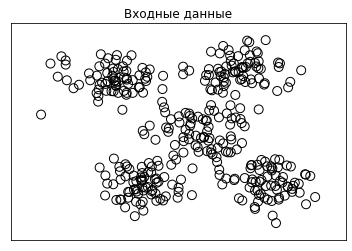

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Входные данные')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Чтобы получить подтверждение, что данные состоят из 5-ти групп, создаем объект kmeans, используя параметры инициализации. Параметр init задает способ инициализации начальных центров кластеров. Чтобы не выбирать их случайным образом, используем для этого параметра значение k-mean++, обеспечивающее улучшенный способ выбора положений центроидов, гарантирующий быструю сходимость алгоритма. Параметр n_clusters определяет количество кластеров, n_init позволяет указать, сколько раз должен выполниться алгоритм, прежде чем будет принято решение касательно наилучшего результата.

In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=num_clusters, n_init=10)

Обучим модель k-средних на входных данных.

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Для визуализации границы, создадим сетку точек и вычислим модель на всех узлах сетки.

Определим шаг сетки.

In [ ]:
step_size = 0.01

Определим сетку и убедимся, что она охватывает все входные данные.

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

Спрогнозируем выходные метки для всех точек сетки, используя обученную модель k-средних.

In [ ]:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

Отобразим выходные значения на графике и выделим каждую область своим цветом. Затем отобразим входные данные на выделенных областях и центры кластеров, полученные с использованием метода k-средних.

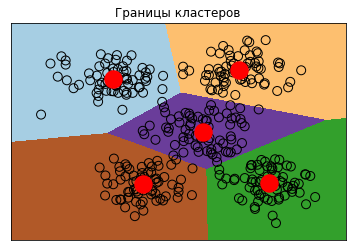

In [ ]:
#отображение областей и выделение их цветом
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(),
                   y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')
#отображение входных точек
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=80)
#отображение центров кластеров
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
            marker='o', s=210, linewidths=4, color='red',
            zorder=12, facecolors='red')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Границы кластеров')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Как мы можем видеть, данные действительно разделены на 5 групп, что четко видно благодаря цветным областям, а также центры кластеров находятся посередине каждой группы точек. Из этого мы можем сделать вывод, что алгоритм сработал верно.

# **Оценка количества кластеров с использованием метода сдвига среднего**

Импортируем пакеты и библиотеки. MeanShift - для кластеризации данных методом сдвига среднего. Estimate_bandwidth - для подсчета ширины окна. Cycle - для создания бесконечного итератора, циклически возвращающего элементы объекта, поддерживающего итерирование.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle 

Загрузим тот же файл для работы, что и в предыдущем разделе.



In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Пользователь загрузил файл "{name}" с длиной битов {length}'.format(
    name=fn, length=len(uploaded[fn])))

Saving data1.txt to data1 (1).txt
Пользователь загрузил файл "data1.txt" с длиной битов 3779


Загрузим входные данные.

In [ ]:
F = np.loadtxt('data1.txt', delimiter=',')

Оценим ширину окна входных данных (bandwidth), то есть параметр базового процесса оценки плотности распределения ядра в алгоритме сдвига среднего. Ширина окна влияет на общую скорость сходимости алгоритма и результирующее количество кластеров.

Параметр quantile влияет на ширину окна. Чем он выше, тем больше ширина окна, соответственно меньше количество кластеров.

В параметре n_samples указывается количество используемых образцов.

In [ ]:
bandwidth_F = estimate_bandwidth(F, quantile=0.1, n_samples=len(F))

Обучим модель кластеризации на основе сдвига среднего, используя полученную оценку ширины окна.

Параметр bin_seeding со значением True делает так, что исходными местоположениями ядер являются не местоположения всех точек, а скорее местоположения дискретизированных версий точек, в которой точки объединяются в сетку, грубость которой соответствует ширине полосы. Установка для этого параметра значения True ускоряет работу алгоритма, поскольку инициализируется меньше начальных чисел.

In [ ]:
meanshift_model = MeanShift(bandwidth=bandwidth_F, bin_seeding=True)
meanshift_model.fit(F)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

Извлечем центры кластеров.

In [ ]:
cluster_centers_2 = meanshift_model.cluster_centers_
print('\nЦентры кластеров\n', cluster_centers_2)


Центры кластеров
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]


Извлечем количество кластеров.

In [ ]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nКоличество кластеров во входных данных =', num_clusters)


Количество кластеров во входных данных = 5


Визуализируем точки данных и отобразим на графике центр текущих кластеров.

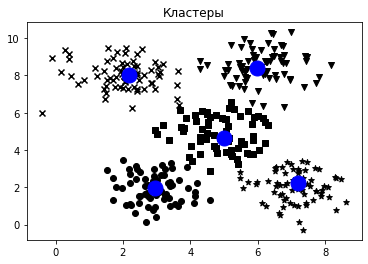

In [ ]:
# Отображение точек и центров кластеров
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Отображение точек, принадлежащих текущему кластеру
    plt.scatter(F[labels==i, 0], F[labels==i, 1], marker=marker, color='black')

    # Отображение центра кластера
    cluster_center_2 = cluster_centers_2[i]
    plt.plot(cluster_center_2[0], cluster_center_2[1], marker='o', 
            markerfacecolor='blue', markeredgecolor='blue', 
            markersize=15)

plt.title('Кластеры')
plt.show()

Как мы видим из полученных результатов, количество кластеров = 5.

# **Оценка качества кластеризации с помощью силуэтных оценок**

Импортируем пакеты и библиотеки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

Загрузим файл, в котором каждая строчка содержит два числа, разделенные запятой.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Пользователь загрузил файл "{name}" с длиной битов {length}'.format(
    name=fn, length=len(uploaded[fn])))

Saving data3.txt to data3.txt
Пользователь загрузил файл "data3.txt" с длиной битов 4546


Загрузим данные из входного файла.

In [ ]:
T = np.loadtxt('data3.txt', delimiter=',')

Инициализируем переменные. В массиве values будет содержаться список значений, итерируя по которым мы будем искать оптимальной количество кластеров.

In [ ]:
scores = []
values = np.arange(2, 10)

Выполним цикл по всем значениям, создавая модель k-средних на каждой итерации. Получим силуэтную оценку для текущей модели кластеризации, используя евклидовы расстояния. Выведем силуэтную оценку для каждого текущего значения.

In [ ]:
#Итерирование в определенном наборе значений
for num_clusters in values:
    # Обучение модели кластеризации KMeans
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(T)
    #Получение силуэтной оценки
    score = metrics.silhouette_score(T, kmeans.labels_, 
                metric='euclidean', sample_size=len(T))
    #Вывод силуэтных оценок
    print("\nНомер кластера =", num_clusters)
    print("Силуэтная оценка =", score)
                    
    scores.append(score)


Номер кластера = 2
Силуэтная оценка = 0.4776262487045448

Номер кластера = 3
Силуэтная оценка = 0.5471742411734871

Номер кластера = 4
Силуэтная оценка = 0.5770200623338162

Номер кластера = 5
Силуэтная оценка = 0.5890032635647954

Номер кластера = 6
Силуэтная оценка = 0.6096904118954453

Номер кластера = 7
Силуэтная оценка = 0.5578810559195374

Номер кластера = 8
Силуэтная оценка = 0.49778885592340444

Номер кластера = 9
Силуэтная оценка = 0.4526905890378284


Визуализируем силуэтные оценки для различных значений.

Text(0.5, 1.0, 'Зависимость силуэтной оценки от количества кластеров')

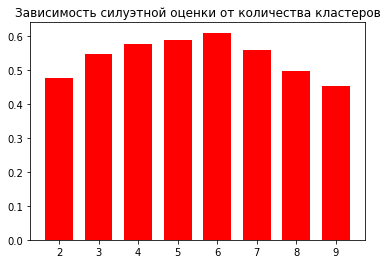

In [ ]:
plt.figure()
plt.bar(values, scores, width=0.7, color='red', align='center')
plt.title('Зависимость силуэтной оценки от количества кластеров')

Извлечем наилучшую оценку и соответствующее значение для количества кластеров.

In [ ]:
num_clusters = np.argmax(scores) + values[0]
print('\nНаилучшая силуэтная оценка у количества кластеров =', num_clusters)


Наилучшая силуэтная оценка у количества кластеров = 6


Визуализируем входные данные.

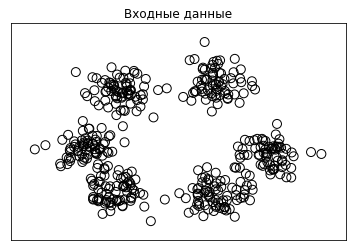

In [ ]:
plt.figure()
plt.scatter(T[:,0], T[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = T[:, 0].min() - 1, T[:, 0].max() + 1
y_min, y_max = T[:, 1].min() - 1, T[:, 1].max() + 1
plt.title('Входные данные')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

Как мы видим, входные данные действительно разделены на 6 групп. Мы же получили, что максимальная силуэтная оценка оказалась при количестве кластеров = 6. Соответственно, качество нашей кластеризации высокое, что мы и доказали с помощью силуэтной оценки.


# **Создание классификатора на основе гауссовской смешанной модели**

Импортируем пакеты и библиотеки. Patches - для рисования 2D моделей. Datasets - для создания наборов данных. Mixture, позволяющий изучать модели гауссовой смеси, отбирать их и оценивать по данным. StratifiedKFold предоставляет индексы для обучения/тестирования для разделения данных на наборы для обучения/тестирования.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches 

In [ ]:
from sklearn import datasets
from sklearn import mixture 
from sklearn.model_selection import StratifiedKFold

Для анализа воспользуемся набором данных iris, который доступен в библиотеке scikit-learn. Загрузим набор данных. Инициируем списки для записи функциональных и целевых тренировочных и тестовых значений.

In [ ]:
iris = datasets.load_iris()
train_values = []
train_targets = []
test_values = []
test_targets = []

Разобьем данные на обучающий и тестовый наборы данных в пропорции 80/20.
Определяем количество поднаборов - 5. 4 части будут использованы для обучения, а оставшаяся - для тестирования, что будет соответствовать пропорции 80/20.

In [ ]:
skf = StratifiedKFold(n_splits=5) #Определение количества поднаборов получаемых данных
# Разбивание исходной выборки на подвыборки с сохранением исходного отношения классов
for train, validation in skf.split(iris.data, iris.target):
  train_values.append(iris.data[train])
  train_targets.append(iris.target[train])
  test_values.append(iris.data[validation])
  test_targets.append(iris.target[validation])

Получаем 5 поднаборов тренировочных и тестовых данных.


Извлечем обучающий набор функций в переменную X_train, обучающий набор целевых значений в Y_train, тестовый набор функций в переменную X_test, тестовый набор целевых значений в Y_test.

In [ ]:
ind = 0
X_train = train_values[ind]    
Y_train = train_targets[ind]   
X_test = test_values[ind]      
Y_test = test_targets[ind]  

Извлечем количество классов обучающих данных.

In [ ]:
num_classes = len(np.unique(Y_train))

Создадим классификатор на основе GMM, используя следующие параметры:


*   n_components позволяет указать количество компонент в базовом распределении. В нашем случае  это будет количество различных классов в наших данных.
*   covarience задает используемый тип ковариации. В нашем случае используется полная ковариация.
*   init_params управляет параметрами, которые должны обновляться в процессе обучения. В нашем случае исполуем значение random, которому соответствует обновление параметров весов, средних значений и точности.
*   max_iter задает максимальное количество итераций ЕМ-алгоритма. 






In [ ]:
classifier = mixture.GaussianMixture(n_components=num_classes, covariance_type='full', init_params='random', max_iter=20)

Инициализируем средние классификатора.

In [ ]:
classifier.means_ = np.array([X_train[Y_train == i].mean(axis=0)
                              for i in range(num_classes)])

Обучаем GMM-классификатор.

In [ ]:
classifier = classifier.fit(X_train, Y_train)

Визуализируем границы классификатора. Для оценки эллиптических границ вокруг кластеров используем собственные векторы и собственные значения. Построим график.

Чтобы обеспечить точное отображение распределения, эллипсы следует повернуть. Оценим величину угла поворота. Увеличим размеры эллипсов для визуализации. Размерами эллипсов управляют собственные значения. 

Точность обучающих данных = 79.16666666666666
Точность тестовых данных = 80.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


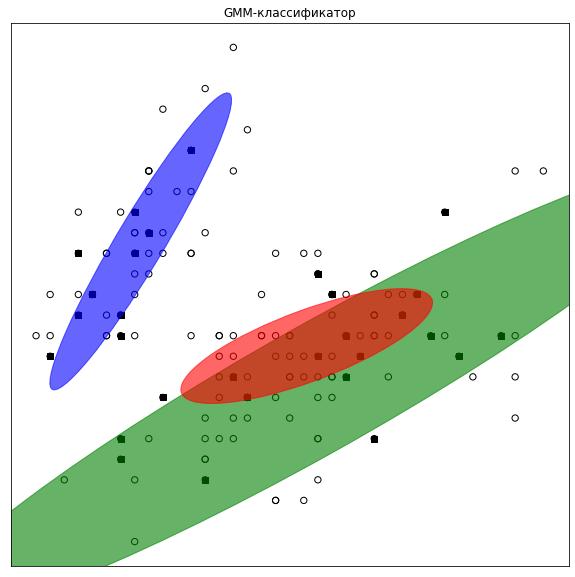

In [ ]:
#Вычерчивание границ
plt.figure(figsize=(10,10))
colors = 'bgr'
for i, color in enumerate(colors):
    #Извлечение собственных значений и собственных векторов
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier.covariances_[i][:2, :2])

    # Нормализация первого собственного вектора 
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    #Извлечение угла наклона 
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    #Масштабный множитель дпя увеличения эллипсов (произвольное значение)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Вычерчивание эллипсов
    ellipse = patches.Ellipse(classifier.means_[i, :2], 
            eigenvalues[0], eigenvalues[1], 180 + angle, 
            color=color)
    axis_handle = plt.subplot(1,1,1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

#Откладывание входных данных на графике
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])
    #Отображение на графике тестовых данных
    test_data = X_test[Y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])
    
#Вычисление прогнозных результатов для обучающих и тестовых данных
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == Y_train.ravel()) * 100
print('Точность обучающих данных =', accuracy_training)
         
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == Y_test.ravel()) * 100
print('Точность тестовых данных =', accuracy_testing)

plt.title('GMM-классификатор')
plt.xticks(())
plt.yticks(())

plt.show()

На данном графике мы можем увидеть, что у нас есть 3 вида целевых данных (3 вида ирисов), представленных эллипсами, а также насколько хорошо модель работает, то есть сколько входных данных она включает (кружочки), а сколько тестовых (квадратики). Из всех 5 поднаборов 1-й имеет лучший результат, поскольку при использовании его самая высокая точность обучающих и тестовых данных. 

# **Нахождение подгрупп на фондовом рынке с использованием модели распространения сходства**

Установим библиотеку yfinance, в которой содержатся данные фондового рынка.

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=6e894e32ca2e14320e7d8390d48604f39f79e4e38f49d293fb1f2bd5b9dd6faa
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Загрузим пакеты и библиотеки. Datetime - для работы с датой и временем. json - для кодирования и декодирования данных в удобном формате. covariance и cluster - для работы с ковариацией и кластеризацией соответственно. yfinance - для загрузки рыночных данных.

In [ ]:
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import covariance, cluster
import yfinance as yf

Загрузим файл, в котором содержатся привязки символических обозначений компаний к их полным названиям.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Пользователь загрузил файл "{name}" с длиной битов {length}'.format(
    name=fn, length=len(uploaded[fn])))

Saving company_symbol_map.json to company_symbol_map (1).json
Пользователь загрузил файл "company_symbol_map.json" с длиной битов 1293


Загрузим из файла массив соответствия символов компаний их полным названиям.

In [ ]:
#Входной файл
input_file = 'company_symbol_map.json'

#Загрузка привязок символов компаний к их полным названиям
with open(input_file) as f:
  company_symbols_map = json.loads(f.read())

symbols, names = np.array(list(company_symbols_map.items())).T

#Получение данных фондового рынка для тикетов
quotes = {symbol: yf.Ticker(symbol).history(period='1d',
                                            start='2010-1-1',
                                            end='2020-1-25') for symbol in symbols}

Извлечем котировки, соответствующие открытию и закрытию биржи.

In [ ]:
'''
#Перебор значений еще один вариант

DifList = []

for quote in quotes:
  DifList.append((quotes[quote].Close - quotes[quote].Open).astype(np.float).tolist())

for i in DifList:
  print(len(i))
'''

In [ ]:
#Извлечение котировок, соответствующих открытию и закрытию биржи
opening_quotes = np.array([quote.Open for quote in quotes.values()]).astype(np.float)
closing_quotes = np.array([quote.Close for quote in quotes.values()]).astype(np.float)

Вычислим разности между котировками при открытии и закрытии биржи. Нормализуем данные. Создадим модель графа. Обучим ее. Создадим модель кластеризации на основе распространения сходства, используя только что обученную краевую модель. Выведем результат.


In [ ]:
from sklearn.covariance import GraphicalLassoCV
quotes_diff = closing_quotes - opening_quotes
'''
#Для закомментированного алгоритма извлечения котировок
quotes_diff = np.array(DifList)
'''

#Нормализация данных
X = quotes_diff.copy().T
X /= X.std(axis=0)

#Создание модели графа
edge_model = GraphicalLassoCV()

#Обучение модели
with np.errstate(invalid='ignore'):
    edge_model.fit(X)

#Создание модели кластеризации на основе распространения сходства
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

#Вывод результата кластеризации
print('\nКластеризация акций по разнице в котировках открытия и закрытия биржи:\n')
for i in range(num_labels + 1):
    print("Cluster", i+1, "==>", ', '.join(names[labels == i]))


Кластеризация акций по разнице в котировках открытия и закрытия биржи:

Cluster 1 ==> Total, Exxon, Chevron, ConocoPhillips, Valero Energy
Cluster 2 ==> Microsoft, Comcast, Amazon, Marriott, Apple, SAP, Cisco, Texas instruments, Home Depot
Cluster 3 ==> IBM, Toyota, Canon, Sony, Ford, Honda, General Electrics, Xerox
Cluster 4 ==> Coca Cola, Mc Donalds, Pepsi, Kraft Foods, Kellogg, Procter Gamble, Colgate-Palmolive, Wal-Mart, Kimberly-Clark
Cluster 5 ==> Wells Fargo, JPMorgan Chase, AIG, American express, Bank of America, Goldman Sachs
Cluster 6 ==> Northrop Grumman, Boeing, Lookheed Martin, General Dynamics
Cluster 7 ==> Walgreen, CVS
Cluster 8 ==> Unilever, GlaxoSmithKline, Pfizer, Sanofi-Aventis, Novartis
Cluster 9 ==> HP, Navistar, 3M, Ryder, Caterpillar, DuPont de Nemours


Вывод представляет различные группы участников фондового рынка за исследовательский период.

# **Сегментирование рынка на основе моделей совершения покупок**

Импортируем пакеты и библиотеки. csv - для чтения csv файлов.

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth 

Загрузим файл, в котором содержатся данные о количестве товара, проданного в различных магазинах одежды.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Пользователь загрузил файл "{name}" с длиной битов'.format(
    name=fn, length=len(uploaded[fn])))

Saving sales.csv to sales (1).csv
Пользователь загрузил файл "sales.csv" с длиной битов


Загрузим данные из входного файла. Поскольку это csv-файл, используем специальный объект Python, предназначенный для чтения данных такого типа, и преобразуем данные в массив numpy.

In [ ]:
#Загрузка данных из входного файла
input_file = 'sales.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
J = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue

    J.append([float(j) for j in row[1:]])

Преобразуем данные в массив Numpy

In [ ]:
J = np.array(J)

Оценим ширину окна входных данных.

In [ ]:
#Оценка ширины окна входных данных
bandwidth = estimate_bandwidth(J, quantile=0.8, n_samples=len(J))

In [ ]:
bandwidth

26006.389359024277

Обучим модель сдвига среднего, основанную на оцененной ширине окна.

In [ ]:
#Вычисление кластеризации методом сдвига среднего
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(J)

MeanShift(bandwidth=26006.389359024277, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

Извлечем маркеры и центры каждого кластера. 

In [ ]:
labels = meanshift_model.labels_
cluster_centers = meanshift_model.cluster_centers_
num_clusters = len(np.unique(labels))

Выведем количество кластеров и кластерные центры.

In [ ]:
print("\nКоличество кластеров во входных данных =", num_clusters)

print("\nЦентры кластеров:")
print('\t'.join([name[:3] for name in names]))
for cluster_center in cluster_centers:
    print('\t'.join([str(int(j)) for j in cluster_center]))


Количество кластеров во входных данных = 9

Центры кластеров:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


У нас шестимерные данные. Визуализируем двумерные данные, сформированные с использованием второго и третьего измерений.

In [ ]:
#Извлечение двух признаков в целях визуализации 
cluster_centers_2d = cluster_centers[:, 1:3]

In [ ]:
print(cluster_centers_2d)

[[ 4637.99746835  6539.08607595]
 [44199.         56158.5       ]
 [29186.         19415.        ]
 [40539.         20120.        ]
 [16745.         12775.        ]
 [34263.         24065.        ]
 [77873.         32543.        ]
 [46397.         97393.        ]
 [ 4939.         63081.        ]]


Отобразим центры кластеров на графике. 

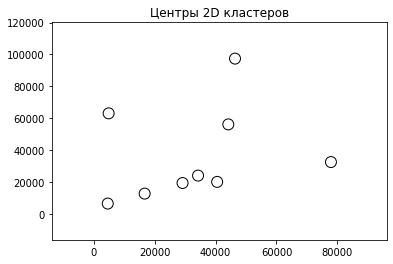

In [ ]:
#Отображение центров кластеров
plt.figure()
plt.scatter(cluster_centers_2d[:,0], cluster_centers_2d[:,1], 
        s=120, edgecolors='black', facecolors='none')

offset = 0.25
plt.xlim(cluster_centers_2d[:,0].min() - offset * cluster_centers_2d[:,0].ptp(),
        cluster_centers_2d[:,0].max() + offset * cluster_centers_2d[:,0].ptp(),)
plt.ylim(cluster_centers_2d[:,1].min() - offset * cluster_centers_2d[:,1].ptp(),
        cluster_centers_2d[:,1].max() + offset * cluster_centers_2d[:,1].ptp())

plt.title('Центры 2D кластеров')
plt.show() 

Таким образом, мы определили стереотипы поведения покупателей и сегментировали рынок на 9 частей (кластеров) на основании информации об объемах продажи товаров в магазинах.